# <a>Projeto 1 - Análise Explortatória de Dados</a>

Análise Exploratória dos Microdados do Exame Nacional do Ensino Médio (ENEM) 2019

# <a>Motivação</a>

Todo trabalho de Ciência de Dados começa pela AED. Conhecer bem os dados, saber as distribuições, medidas estatísticas principais, visualizar correlações e evoluções é essencial para gerar insights e solucionar problemas.

Essa etapa é hibrída, ou seja, pode ser realizada sem um objetivo bem definido, apenas uma busca por informações e insights a partir dos dados. Por outro lado, um projeto com objetivos bem definidos (fase 1 do CRISP-DM) seria direcionado para as questões mais importantes do negócio.

# <a>Objetivo</a>

Vamos trabalhar com os microdados do Exame Nacional do Ensino Médio (ENEM) realizado em 2019. De acordo com o site do INEP, o ENEM tem o objetivo de avaliar o desempenho escolar dos estudantes ao término do Ensino Médio. As notas podem ser utilizadas para entrar em universidades brasileiras através do SISU ou ProUni, e também algumas instituições portuguesas.

Conhecer bem os dados dos aplicantes para a prova pode fornecer insights preciosos para a educação brasileira. Para o presente estudo vamos avaliar se dados demográficos, indicadores sociais, de escolaridade dos pais e outros tem correlações com as notas dos candidatos.

In [1]:
# Importanto as bibliotecas para leitura de dados e plotagem de gráficos:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurando pandas para mostrar todas as linhas e colunas:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Configurando pandas para não mostrar notação científica:

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Instalando o pyarrow para ler arquivos parquet:

! pip install pyarrow

In [3]:
# Importando os dados em parquet:

df_enem = pd.read_parquet('C:\data_science\projeto-enem\enem_2019.parquet')
df_enem.shape

(5095270, 136)

In [4]:
# Vamos fazer uma amostragem de 10% da base de dados total:

df_enem = df_enem.sample(n = len(df_enem)//10, random_state = 42, replace = False)
df_enem.shape

(509527, 136)

In [5]:
# Primeira visualização dos dados:

df_enem.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  \
5089962  190005708034    2019                  2305506   
1968816  190003326900    2019                  3548500   
3432726  190004261548    2019                  3552106   
637236   190001849598    2019                  3541000   
2759179  190003685883    2019                  4106902   

        NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
5089962                  Iguatu                23               CE     22.00   
1968816                  Santos                35               SP     19.00   
3432726                 Socorro                35               SP     16.00   
637236             Praia Grande                35               SP     22.00   
2759179                Curitiba                41               PR     17.00   

        TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
5089962       F                1            3                 1   
1968816       F                1            1                 1   
3432726       F                1            1                 1   
637236        M                1            1                 1   
2759179       M                1            1                 1   

         CO_MUNICIPIO_NASCIMENTO NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO  \
5089962               2305506.00                  Iguatu             23.00   
1968816               3548500.00                  Santos             35.00   
3432726               3552106.00                 Socorro             35.00   
637236                3541000.00            Praia Grande             35.00   
2759179               4106902.00                Curitiba             41.00   

        SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
5089962               CE                1                3          1   
1968816               SP                1                1          1   
3432726               SP                3                0          1   
637236                SP                1                5          1   
2759179               PR                2                0          3   

         TP_ENSINO  IN_TREINEIRO  CO_ESCOLA  CO_MUNICIPIO_ESC  \
5089962       1.00             0        NaN               NaN   
1968816       1.00             0        NaN               NaN   
3432726        NaN             1        NaN               NaN   
637236        1.00             0        NaN               NaN   
2759179       1.00             0        NaN               NaN   

        NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
5089962             None        NaN      None                     NaN   
1968816             None        NaN      None                     NaN   
3432726             None        NaN      None                     NaN   
637236              None        NaN      None                     NaN   
2759179             None        NaN      None                     NaN   

         TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
5089962                 NaN              NaN               0            0   
1968816                 NaN              NaN               0            0   
3432726                 NaN              NaN               0            0   
637236                  NaN              NaN               0            0   
2759179                 NaN              NaN               0            0   

         IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
5089962          0                        0                  0   
1968816          0                        0                  0   
3432726          0                        0                  0   
637236           0                        0                  0   
2759179          0                        0                  0   

         IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
5089962                      0                      0                   0   
1968816                 

In [6]:
# Verificando se não temos candidatos repetidos:

len(df_enem['NU_INSCRICAO'].unique())

509527

In [7]:
# Verificando o tipo dos dados (por coluna do DataFrame):

df_enem.dtypes

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC   

In [8]:
# Vamos usar o list comprehension para entendermos o que temos na lista
# EXEMPLO: selecionar apenas as colunas que começam com NU:

lista_colunas_nu = [coluna for coluna in df_enem.columns if 'NU' in coluna]
display(lista_colunas_nu)

['NU_INSCRICAO',
 'NU_ANO',
 'NU_IDADE',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [9]:
# Vamos agora começar a separar algumas colunas que serão removidas
# Começando pelas colunas com as respostas (que não são relevantes para o estudo):

colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
display(colunas_questoes)

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [10]:
# Vamos selecionar também as colunas com códigos para remoção

colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
display(colunas_codigos)

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [11]:
# Não faremos uma análise por municipio, e portanto, eles também serão removidos:

colunas_municipio = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
display(colunas_municipio)

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [12]:
# Removendo as colunas desnecessárias para nosso estudo:

colunas_remover = colunas_questoes + colunas_codigos + colunas_municipio + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1)
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
5089962               CE     22.00       F                1            3   
1968816               SP     19.00       F                1            1   
3432726               SP     16.00       F                1            1   
637236                SP     22.00       M                1            1   
2759179               PR     17.00       M                1            1   

         TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
5089962                 1               CE                1                3   
1968816                 1               SP                1                1   
3432726                 1               SP                3                0   
637236                  1               SP                1                5   
2759179                 1               PR                2                0   

         TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
5089962          1       1.00             0      None                     NaN   
1968816          1       1.00             0      None                     NaN   
3432726          1        NaN             1      None                     NaN   
637236           1       1.00             0      None                     NaN   
2759179          3       1.00             0      None                     NaN   

         TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
5089962                 NaN              NaN               0            0   
1968816                 NaN              NaN               0            0   
3432726                 NaN              NaN               0            0   
637236                  NaN              NaN               0            0   
2759179                 NaN              NaN               0            0   

         IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
5089962          0                        0                  0   
1968816          0                        0                  0   
3432726          0                        0                  0   
637236           0                        0                  0   
2759179          0                        0                  0   

         IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
5089962                      0                      0                   0   
1968816                      0                      0                   0   
3432726                      0                      0                   0   
637236                       0                      0                   0   
2759179                      0                      0                   0   

         IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  \
5089962            0               0           0                   0   
1968816            0               0           0                   0   
3432726            0               0           0                   0   
637236             0               0           0                   0   
2759179            0               0           0                   0   

         IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  \
5089962             0            0            0         0   
1968816             0            0            0         0   
3432726             0            0            0         0   
637236              0            0            0         0   
2759179             0            0            0         0   

         IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  \
5089962                            0               0           0   
1968816                            0               0           0   
3432726                            0               0           0   
637236                             0               0           0   
2759179                            0               0           0   

         IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  

In [13]:
df_enem.shape

(509527, 109)

## <a>Dicionário dos Dados </a>

Muitas colunas possuem somente números, sem descrições. Os dados do ENEM vem acompanhados das descrições com o dicionário, explicando o que cada coluna representa. Seguem algumas que serão utilizadas na nossa Análise Exploratória:

Estado Civil (TP_ESTADO_CIVIL)

| Código | Descrição                               |
|--------|-----------------------------------------|
|    0   | Não informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Viúvo(a)                                |

Cor/Raça (TP_COR_RACA)

| Código | Descrição     |
|--------|---------------|
| 0      | Não declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Indígena      |

Tipo Nacionalidade

| Código | Descrição                                       |
|--------|-------------------------------------------------|
| 0      | Não informado                                   |
| 1      | Brasileiro(a)                                   |
| 2      | Brasileiro(a)   Naturalizado(a)                 |
| 3      | Estrangeiro(a)                                  |
| 4      | Brasileiro(a)   Nato(a), nascido(a) no exterior |
| 5      | Indígena                                        |

Situação de Conclusão Nível Médio

| Código | Descrição                                              |
|--------|--------------------------------------------------------|
| 1      | Já concluí o   Ensino Médio                            |
| 2      | Estou   cursando e concluirei o Ensino Médio em 2019   |
| 3      | Estou   cursando e concluirei o Ensino Médio após 2019 |
| 4      | Não   concluí e não estou cursando o Ensino Médio      |

Finalmente, as colunas de notas

| Coluna     | Descrição                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ciências da Natureza |
| NU_NOTA_CH | Nota da prova de Ciências Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e Códigos |
| NU_NOTA_MT | Nota da prova de Matemática           |

# <a> Estatística Descritiva </a>

O primeiro passo é determinar as Medidas Estatística, são elas: Medidas de Tendência Central - MTC, de Dispersão, Separatrizes e Distribuições. Elas são essenciais para conhecermos melhor os dados que estamos trabalhando.

In [14]:
# Vamos utilizar o método describe para já termos algumas respostas estatísticas:
# O método retorna: contagem, média, desvio padrão, os 3 quartis, valores máximo e mínimo

df_enem.describe()

NU_IDADE  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
count 509519.00        509527.00    509527.00         509527.00   
mean      22.10             1.08         2.13              1.03   
std        7.47             0.44         1.02              0.21   
min       12.00             0.00         0.00              0.00   
25%       18.00             1.00         1.00              1.00   
50%       19.00             1.00         2.00              1.00   
75%       24.00             1.00         3.00              1.00   
max       86.00             4.00         5.00              4.00   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
count        509527.00        509527.00  509527.00  287993.00     509527.00   
mean              1.54             2.96       1.33       1.00          0.12   
std               0.72             4.11       0.55       0.07          0.33   
min               1.00             0.00       1.00       1.00          0.00   
25%               1.00             0.00       1.00       1.00          0.00   
50%               1.00             1.00       1.00       1.00          0.00   
75%               2.00             4.00       2.00       1.00          0.00   
max               4.00            13.00       3.00       2.00          1.00   

       TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
count               114894.00           114894.00        114894.00   
mean                     2.25                1.04             1.01   
std                      0.75                0.19             0.12   
min                      1.00                1.00             1.00   
25%                      2.00                1.00             1.00   
50%                      2.00                1.00             1.00   
75%                      2.00                1.00             1.00   
max                      4.00                2.00             4.00   

       IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  \
count       509527.00    509527.00  509527.00                509527.00   
mean             0.00         0.00       0.00                     0.00   
std              0.04         0.01       0.02                     0.02   
min              0.00         0.00       0.00                     0.00   
25%              0.00         0.00       0.00                     0.00   
50%              0.00         0.00       0.00                     0.00   
75%              0.00         0.00       0.00                     0.00   
max              1.00         1.00       1.00                     1.00   

       IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  \
count          509527.00              509527.00              509527.00   
mean                0.00                   0.00                   0.00   
std                 0.00                   0.04                   0.02   
min                 0.00                   0.00                   0.00   
25%                 0.00                   0.00                   0.00   
50%                 0.00                   0.00                   0.00   
75%                 0.00                   0.00                   0.00   
max                 1.00                   1.00                   1.00   

       IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  \
count           509527.00    509527.00       509527.00   509527.00   
mean                 0.00         0.00            0.00        0.00   
std                  0.04         0.02            0.01        0.02   
min                  0.00         0.00            0.00        0.00   
25%                  0.00         0.00            0.00        0.00   
50%                  0.00         0.00            0.00        0.00   
75%                  0.00         0.00            0.00        0.00   
max                  1.00         1.00            1.00        1.00   

       IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  \
count           

In [15]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509527 entries, 5089962 to 1881021
Columns: 109 entries, SG_UF_RESIDENCIA to Q025
dtypes: float64(16), int64(64), object(29)
memory usage: 427.6+ MB


In [16]:
# Vamos selecionar apenas as colunas com notas:

colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
display(colunas_notas)

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [17]:
# Vamos remover as notas de competência na redação, e deixar apenas as das provas e da redação final

colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
display(colunas_notas)

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

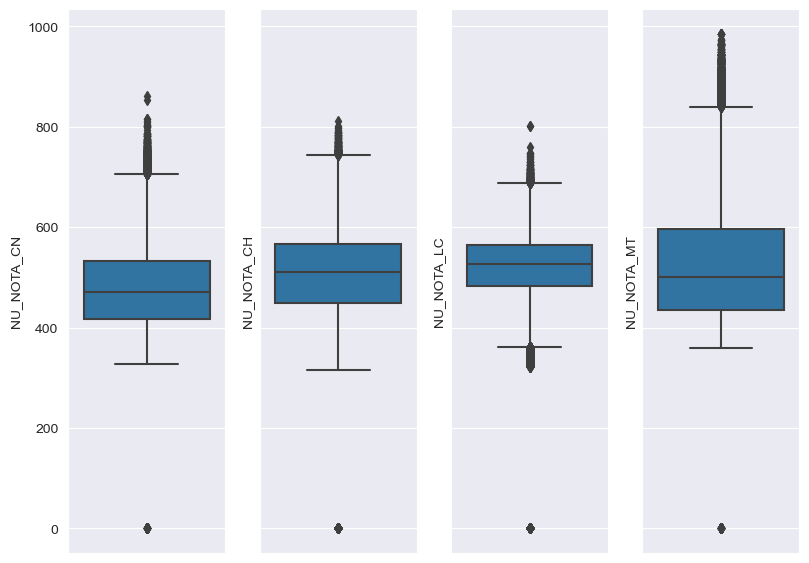

In [18]:
# Analisando as notas, exceto a de redação, por meio de boxplots:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6)) #sharey é importante para facilitar a visualização
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])

Os outliers 0 são as pessoas que não fizeram a prova (ou realmente zeraram).
Aqui percebemos que a maior média foi em Linguagens e códigos, e a menor em ciências naturais.
Porém, os valores mais dentro dos 3 quartis foi a nota de Matemática.

<Figure size 800x600 with 0 Axes>

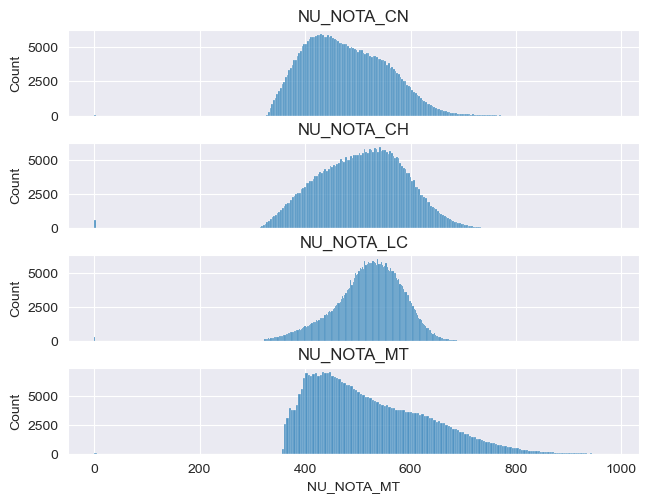

In [19]:
# Analisando a Distribuição das notas:

sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
figura, graficos = plt.subplots(4, 1, sharex=True)
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

Perceb-se que a maioria das notas estão mais para baixo em Matemática e Ciências Naturais, e mais para cima em Linguagens e Códigos e Ciências Humanas. O que já era, de certa forma, esperado.

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

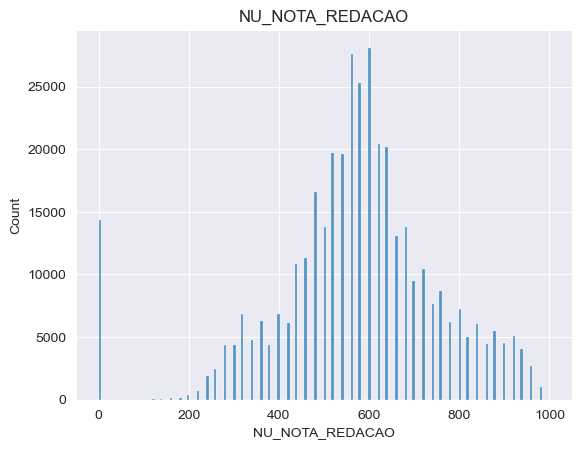

In [20]:
# Vamos agora analisar a nota da redação, primeiro plotando um histograma:

sns.histplot(data = df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

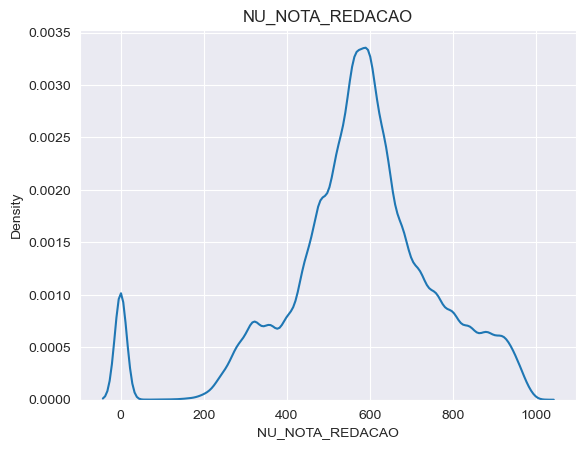

In [21]:
# Como as notas estão esparsas o histograma não funcionou bem, vamos plotar um gráfico de densidade:

sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Percebe-se muitas notas zeradas, de pessoas que não foram, ou não cumpriram o mínimo necessário. Mas a maioria se encontra em uma distribuição fácil de ser percebida entre 400 e 800, com um pico por volta de 600.

# <a>Analisando as Informações Demográficas</a>

In [22]:
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
5089962               CE     22.00       F                1            3   
1968816               SP     19.00       F                1            1   
3432726               SP     16.00       F                1            1   
637236                SP     22.00       M                1            1   
2759179               PR     17.00       M                1            1   

         TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
5089962                 1               CE                1                3   
1968816                 1               SP                1                1   
3432726                 1               SP                3                0   
637236                  1               SP                1                5   
2759179                 1               PR                2                0   

         TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
5089962          1       1.00             0      None                     NaN   
1968816          1       1.00             0      None                     NaN   
3432726          1        NaN             1      None                     NaN   
637236           1       1.00             0      None                     NaN   
2759179          3       1.00             0      None                     NaN   

         TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
5089962                 NaN              NaN               0            0   
1968816                 NaN              NaN               0            0   
3432726                 NaN              NaN               0            0   
637236                  NaN              NaN               0            0   
2759179                 NaN              NaN               0            0   

         IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
5089962          0                        0                  0   
1968816          0                        0                  0   
3432726          0                        0                  0   
637236           0                        0                  0   
2759179          0                        0                  0   

         IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
5089962                      0                      0                   0   
1968816                      0                      0                   0   
3432726                      0                      0                   0   
637236                       0                      0                   0   
2759179                      0                      0                   0   

         IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  \
5089962            0               0           0                   0   
1968816            0               0           0                   0   
3432726            0               0           0                   0   
637236             0               0           0                   0   
2759179            0               0           0                   0   

         IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  \
5089962             0            0            0         0   
1968816             0            0            0         0   
3432726             0            0            0         0   
637236              0            0            0         0   
2759179             0            0            0         0   

         IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  \
5089962                            0               0           0   
1968816                            0               0           0   
3432726                            0               0           0   
637236                             0               0           0   
2759179                            0               0           0   

         IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  

In [23]:
# Vamos "limpar" os índices, tornando-o sequencial:

df_enem = df_enem.reset_index(drop = True)
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               CE     22.00       F                1            3   
1               SP     19.00       F                1            1   
2               SP     16.00       F                1            1   
3               SP     22.00       M                1            1   
4               PR     17.00       M                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               CE                1                3   
1                 1               SP                1                1   
2                 1               SP                3                0   
3                 1               SP                1                5   
4                 1               PR                2                0   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1       1.00             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1        NaN             1      None                     NaN   
3          1       1.00             0      None                     NaN   
4          3       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [24]:
# Vamos começar pela análise da IDADE dos candidatos
# Contando quantos candidatos de cada idade temos:

df_enem['NU_IDADE'].value_counts().sort_index()  #sort_index usado para ordenar pelo valor(idade)

12.00        6
13.00       23
14.00      529
15.00     7824
16.00    31369
17.00    84619
18.00    86634
19.00    57786
20.00    41133
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
66.00       55
67.00       63
68.00       35
69.00       31
70.00       27
71.00       18
72.00       12
73.00        8
74.00       10
75.00        7
76.00        3
77.00        1
78.00     

<Axes: xlabel='NU_IDADE', ylabel='Density'>

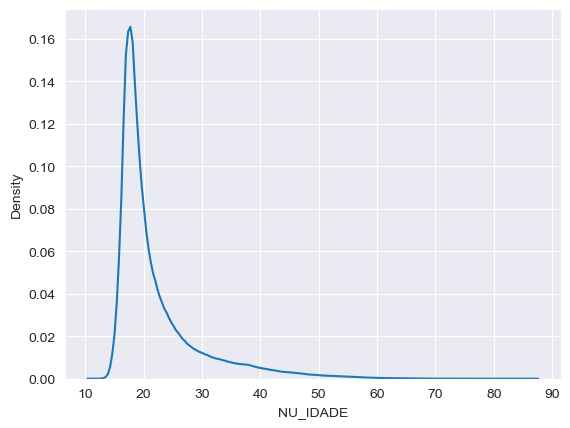

In [25]:
# Vamos plotar um gráfico de densidade para melhor visualizar:

sns.kdeplot(data=df_enem, x = 'NU_IDADE')

Já era de se esperar que a maioria ficasse localizada entre 15 e 20 anos, porém temos outliers para cima

In [26]:
# Vamos agora analisar o GÊNERO de cada candidato, começando pela contagem:

df_enem['TP_SEXO'].value_counts()

F    303139
M    206388
Name: TP_SEXO, dtype: int64

In [27]:
# Transformando em porcentagem:

df_enem['TP_SEXO'].value_counts(normalize=True)*100

F   59.49
M   40.51
Name: TP_SEXO, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

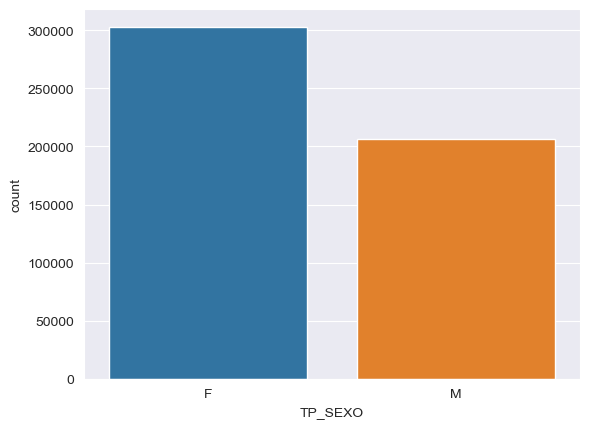

In [28]:
# Plotando um gráfico de barra simples para visualização:

sns.countplot(data=df_enem, x='TP_SEXO')

In [29]:
# Analisando agora o ESTADO CIVIL dos participantes, onde:
# 0 - Não informado
# 1 - Solteiro(a)
# 2 - Casado / Mora com parceiro(a)
# 3 - Divorciado(a) / Desquitado(a) / Separado(a)
# 4 - Viúvo(a)

df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     20345
1    439950
2     39834
3      8763
4       635
Name: TP_ESTADO_CIVIL, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

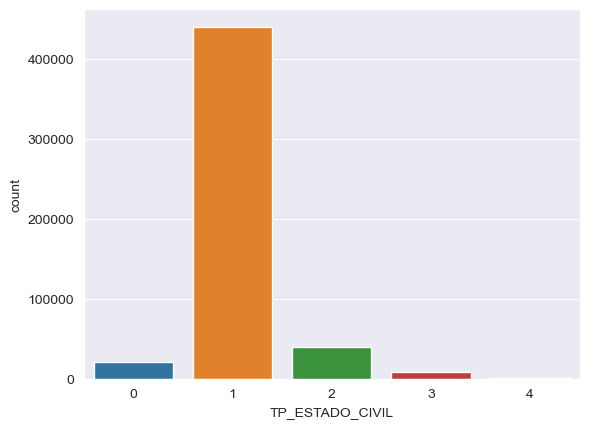

In [30]:
# Plotando um gráfico de barras simples para visualização:

sns.countplot(data = df_enem, x = 'TP_ESTADO_CIVIL')

Como se trata de adolescentes, já era esperado que a maioria esmagadora fossem de solteiros

In [31]:
# Analisando agora a RAÇA dos participantes, onde:

# 0 - Não informado
# 1 - Branca
# 2 - Preta
# 3 - Parda
# 4 - Amarela
# 5 - Indígena

df_enem['TP_COR_RACA'].value_counts().sort_index()

0     10446
1    183179
2     64694
3    236369
4     11616
5      3223
Name: TP_COR_RACA, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

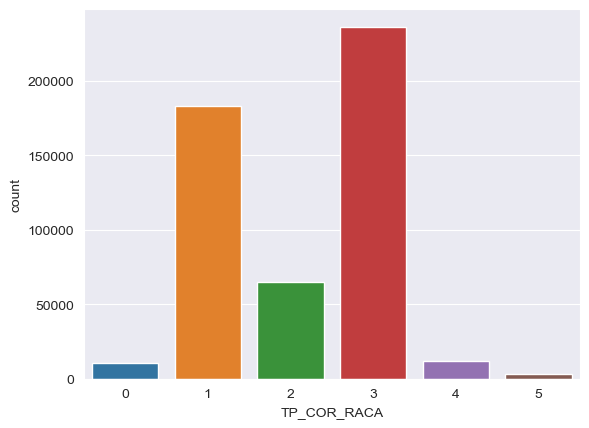

In [32]:
# Plotando um gráfico de barra simples:

sns.countplot(data = df_enem, x = 'TP_COR_RACA')

In [33]:
# Analisando o ESTADO de onde os candidatos vieram:

ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

SP    81333
MG    53702
BA    39880
RJ    34042
CE    29581
PA    27861
PE    27051
MA    22157
RS    21989
PR    20829
GO    17074
PB    14891
PI    12134
RN    11781
AM    11737
SC    10896
ES    10239
DF     9485
AL     9283
MT     8757
SE     7714
MS     7057
RO     5804
TO     4693
AP     4319
AC     3955
RR     1283
Name: SG_UF_RESIDENCIA, dtype: int64

In [34]:
# Para visualizar melhor essa informação, utilizaremos um gráfico treemap:

df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values})

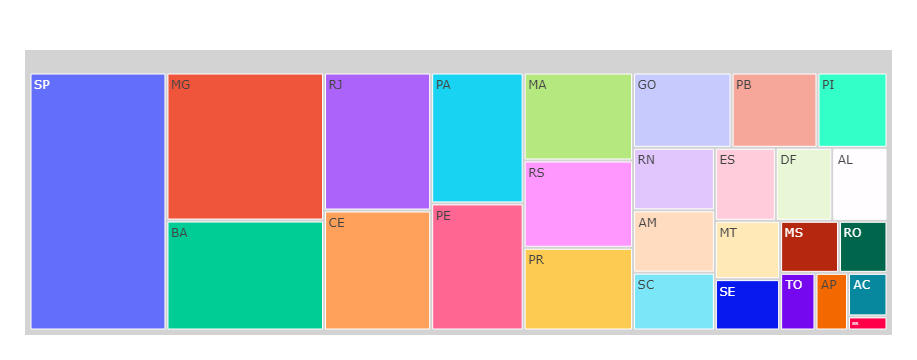

In [35]:
import plotly.express as px

fig = px.treemap(data_frame = df_ufs, path = ['uf'], values = 'candidatos')
fig.update_traces(root_color = "lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Percebemos que o estado de São Paulo é o com mais candidatos, seguido por Minas e Bahia. O Rio de Janeiro, Ceará, Pará e Pernambuco também possuem um bom número de candidatos. Juntos esses estados enviaram mais candidatos ao Enem 2019 que o restantes dos estados do país combinados.

In [36]:
# Analisando a ESCOLARIDADE DO PAI OU RESPONSÁVEL:

# A - Nunca estudou
# B - Estudou até o 5º ano do Ensino Fundamental
# C - Estudou até o 9º ano do Ensino Fundamental
# D - Ensino Fundamental completo
# E - Ensino Médio completo
# F - Ensino Superior Completo
# G - Completou Pós-graduação
# H - Não sei informar

df_enem['Q001'].value_counts().sort_index()

A     29079
B    113489
C     72236
D     58789
E    130900
F     37494
G     22957
H     44583
Name: Q001, dtype: int64

Percebemos que os maiores pontos são até o 5º ano do Fundamental, e Médio Completo.

In [37]:
# Avaliando o impacto nos dados daqueles que responderam 'Não sei informar'
len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0]

0.0874987979047234

In [38]:
# Avaliando a ESCOLARIDADE DA MÃE OU RESPONSÁVEL:

df_enem['Q002'].value_counts().sort_index()

A     19580
B     85678
C     68403
D     67117
E    162963
F     51384
G     39806
H     14596
Name: Q002, dtype: int64

O maior pico aqui foi no ensino médio completo.

In [39]:
# Avaliando o impacto nos dados daqueles que responderam 'Não sei informar'
len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0]

0.028646175766936788

Percebe-se que apenas 2% não sabem informar a escolaridade da mãe, enquanto 8% não sabem informar a do pai.

In [40]:
# Vamos agora separar a escolaridade do responsável em um prisma
# O "corte" ocorre no ensino médio
# As novas colunas aparecem no final do DataFrame

df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F','G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F','G'])
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               CE     22.00       F                1            3   
1               SP     19.00       F                1            1   
2               SP     16.00       F                1            1   
3               SP     22.00       M                1            1   
4               PR     17.00       M                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               CE                1                3   
1                 1               SP                1                1   
2                 1               SP                3                0   
3                 1               SP                1                5   
4                 1               PR                2                0   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1       1.00             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1        NaN             1      None                     NaN   
3          1       1.00             0      None                     NaN   
4          3       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [41]:
# Porcentagem de quantos pais ou responsáveis possuem ensino superior:

df_enem['pai_possui_superior'].value_counts(normalize=True)*100

False   88.14
True    11.86
Name: pai_possui_superior, dtype: float64

<Axes: xlabel='pai_possui_superior', ylabel='count'>

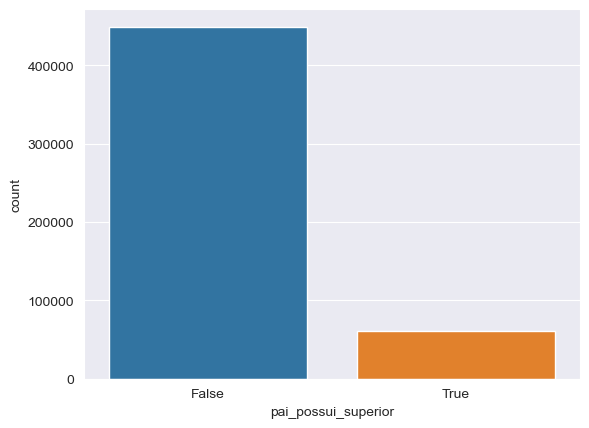

In [42]:
# Plotando um gráfico com os números reais:

sns.countplot(data=df_enem, x='pai_possui_superior')

Percebemos que a maioria dos pais ou responsável não possui ensino superior.

In [43]:
# Porcentagem de quantas mães ou responsáveis possuem ensino superior:

df_enem['mae_possui_superior'].value_counts(normalize=True)*100

False   82.10
True    17.90
Name: mae_possui_superior, dtype: float64

<Axes: xlabel='mae_possui_superior', ylabel='count'>

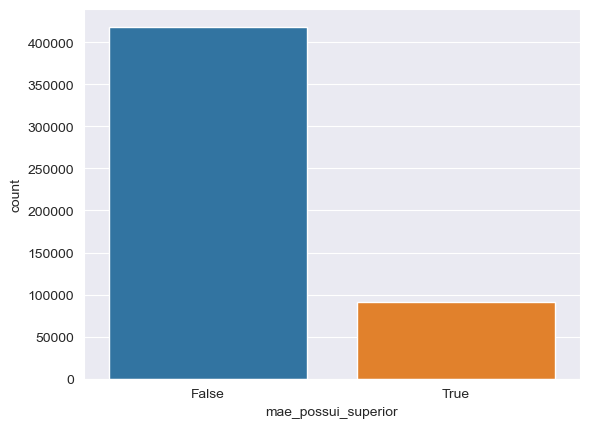

In [44]:
# Plotando um gráfico com os números reais:

sns.countplot(data=df_enem, x='mae_possui_superior')

A porcentagem de mães com ensino superior é maior que a de pais, mas isso pode ter a influencia sobre o fato do candidato saber ou não a escolaridade do pai.

In [ ]:
# Vamos agora analisar a renda familiar:

'''
A Nenhuma renda.
B Até R$ 998,00.
C De R$ 998,01 até R$ 1.497,00.
D De R$ 1.497,01 até R$ 1.996,00.
E De R$ 1.996,01 até R$ 2.495,00.
F De R$ 2.495,01 até R$ 2.994,00.
G De R$ 2.994,01 até R$ 3.992,00.
H De R$ 3.992,01 até R$ 4.990,00.
I De R$ 4.990,01 até R$ 5.988,00.
J De R$ 5.988,01 até R$ 6.986,00.
K De R$ 6.986,01 até R$ 7.984,00.
L De R$ 7.984,01 até R$ 8.982,00.
M De R$ 8.982,01 até R$ 9.980,00.
N De R$ 9.980,01 até R$ 11.976,00.
O De R$ 11.976,01 até R$ 14.970,00.
P De R$ 14.970,01 até R$ 19.960,00.
Q Mais de R$ 19.960,00.

'''

In [45]:
# Vamos agora transformar a feature Q006 em algo numérico:

from string import ascii_uppercase

dicionario_renda = dict()

# Fazendo uma iteração sobre o alfabeto
for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i

# Função de mapeamento:
df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)

df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               CE     22.00       F                1            3   
1               SP     19.00       F                1            1   
2               SP     16.00       F                1            1   
3               SP     22.00       M                1            1   
4               PR     17.00       M                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               CE                1                3   
1                 1               SP                1                1   
2                 1               SP                3                0   
3                 1               SP                1                5   
4                 1               PR                2                0   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1       1.00             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1        NaN             1      None                     NaN   
3          1       1.00             0      None                     NaN   
4          3       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

<Axes: xlabel='renda_familiar', ylabel='count'>

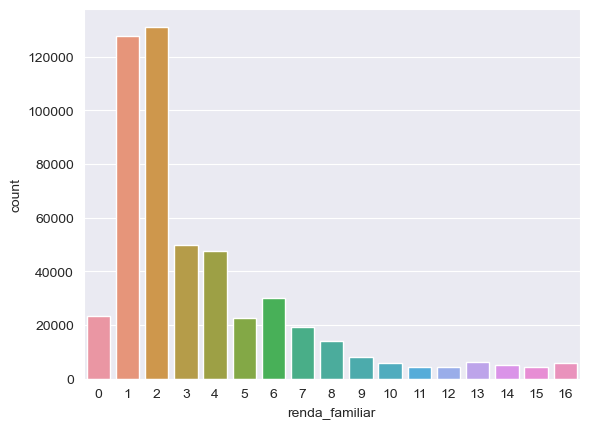

In [46]:
# Plotando o gráfico da renda familiar:

sns.countplot(data = df_enem, x = 'renda_familiar')

Percebemos como a distribuição de renda é assustadoramente desigual no país

# <a>Relacionar Notas com Características dos Candidatos</a>

Vamos agora avaliar se os seguintes itens demográficos influenciam a nota dos cadidatos:

    - Gênero
    - Raça
    - Atendimento especial
    - Instrução do Pai e Mãe
    - Renda mensal familiar

In [48]:
# Criando um DataFrame com notas e gênero dos candidatos:

df_genero = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_genero.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0         NaN         NaN         NaN         NaN              NaN       F
1      543.90      527.70      545.30      513.90           680.00       F
2      406.10      521.20      549.20      510.50           480.00       F
3      520.50      488.00      549.20      599.40           500.00       M
4      577.10      587.00      610.70      747.00           780.00       M

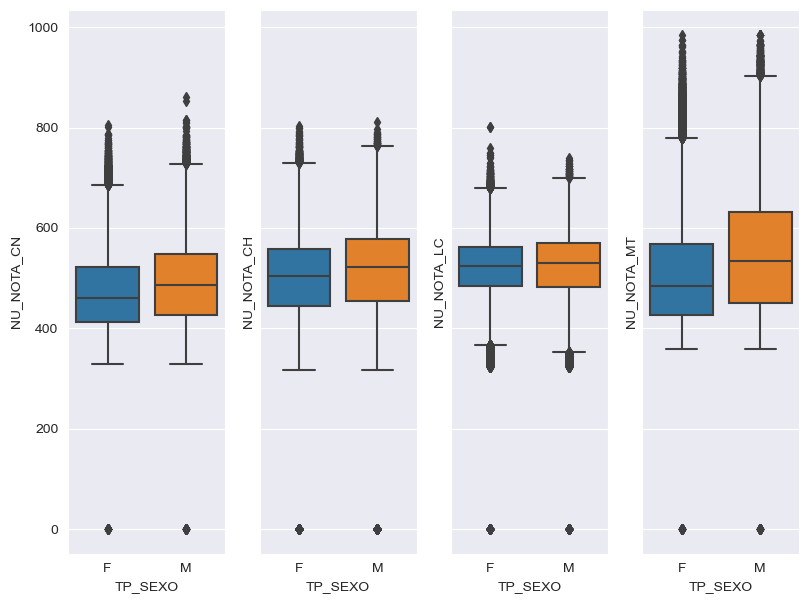

In [50]:
# Vamos plotar Boxplots para comparar o desempenho, por gênero do candidato, em cada prova:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_genero, y=coluna_1, x='TP_SEXO', ax=graficos[i])

Percebe-se que o desempenho é muito semelhante principalmente na prova de Linguagens e Códigos. Apenas na prova de Matemática os candidatos do gênero Masculino tiveram um desempenho superior (vide as linhas dos quartis, especialmente e mediana). É interessante verificar que com exceção das provas zeradas (participantes que não compareceram) apenas a prova de Linguagem e Códigos possui outliers para baixo em ambos os gêneros. Já a prova de Matemática é a que possui mais outliers para cima (especialmente do gênero feminino).

Lembrando que não se pode fazer nenhuma inferência que correlacione o gênero do candidato com seu desempenho nas provas. Apenas extrair conclusões do que ocorreu com a amostra de 10% de todos os candidatos do Enem 2019.

In [51]:
# Criando um DataFrame com as notas e as raças dos candidatos:

df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1      543.90      527.70      545.30      513.90           680.00   
2      406.10      521.20      549.20      510.50           480.00   
3      520.50      488.00      549.20      599.40           500.00   
4      577.10      587.00      610.70      747.00           780.00   

   TP_COR_RACA  
0            3  
1            1  
2            1  
3            1  
4            1

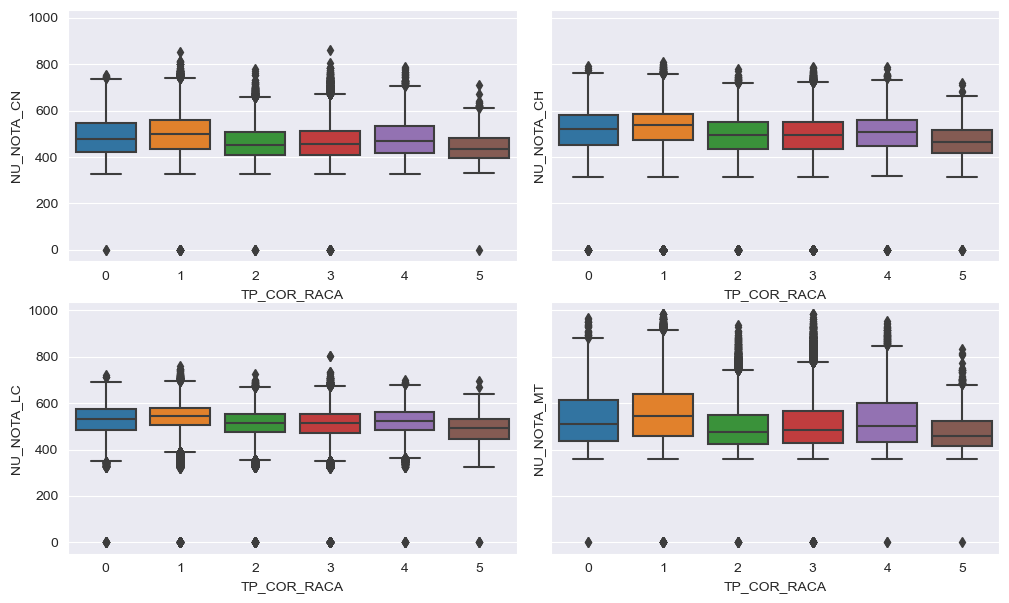

In [52]:
# Vamos plotar Boxplots para comparar o desempenho, por raça do candidato, em cada prova:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2 + 1]
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

Percebe-se desempenhos bem parecidos entre as raças, em todas as provas tivemos outliers para cima, e apenas em Linguagem e Códigos tivemos para baixo (desconsiderando as provas zeradas). Percebe-se também um desempenho ligeiramente superior de candidatos 0 (raça não informada) e 1 (branca).

Lembrando que não se pode fazer nenhuma inferência que correlacione a raça do candidato com seu desempenho nas provas. Apenas extrair conclusões do que ocorreu com a amostra de 10% de todos os candidatos do Enem 2019.

In [57]:
# Vamos contabilizar todos os atendimentos especializados:

colunas_atendimento_especializado = ['IN_BAIXA_VISAO',
                                     'IN_CEGUEIRA', 
                                     'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 
                                     'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 
                                     'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 
                                     'IN_DISLEXIA', 'IN_DISCALCULIA', 
                                     'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 
                                     'IN_OUTRA_DEF']

df_atendimento_especializado = df_enem.loc[:, colunas_notas]
df_atendimento_especializado['atendimento_especializado'] = df_enem.loc[:, colunas_atendimento_especializado].sum(axis=1) > 0
df_atendimento_especializado.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1      543.90      527.70      545.30      513.90           680.00   
2      406.10      521.20      549.20      510.50           480.00   
3      520.50      488.00      549.20      599.40           500.00   
4      577.10      587.00      610.70      747.00           780.00   

   atendimento_especializado  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False

In [58]:
# Fazendo uma contagem dos candidatos que solicitaram atendimento especializado:

df_atendimento_especializado['atendimento_especializado'].value_counts()

False    506207
True       3320
Name: atendimento_especializado, dtype: int64

In [59]:
# Em termos de porcentagem:

df_atendimento_especializado['atendimento_especializado'].value_counts(normalize=True) *100

False   99.35
True     0.65
Name: atendimento_especializado, dtype: float64

Percebe-se que menos de 1% dos candidatos solicitou atendimento especializado.

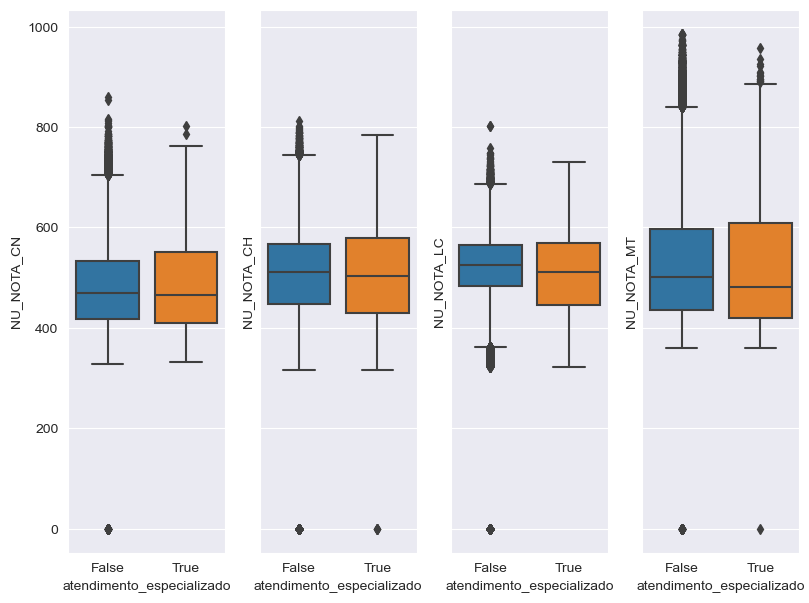

In [60]:
# Vamos plotar Boxplots para comparar o desempenho em cada prova dos candidatos que solicitaram atendimento especializado:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_atendimento_especializado, y=coluna_1, x='atendimento_especializado', ax=graficos[i])

Percebe-se que o desempenho dos candidatos que solicitaram atendimento especializado é muito parecido com o dos demais candidatos, mesmo eles sendo menos que 1% do total da amostra.

Lembrando que não se pode fazer nenhuma inferência que correlacione a necessidade de atendimento especializado do candidato com seu desempenho nas provas. Apenas extrair conclusões do que ocorreu com a amostra de 10% de todos os candidatos do Enem 2019.

In [61]:
# Criando um DataFrame com as notas e o nível de instrução dos pais e mães:

df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1      543.90      527.70      545.30      513.90           680.00   
2      406.10      521.20      549.20      510.50           480.00   
3      520.50      488.00      549.20      599.40           500.00   
4      577.10      587.00      610.70      747.00           780.00   

   pai_possui_superior  mae_possui_superior  
0                False                False  
1                False                False  
2                 True                 True  
3                False                False  
4                False                False

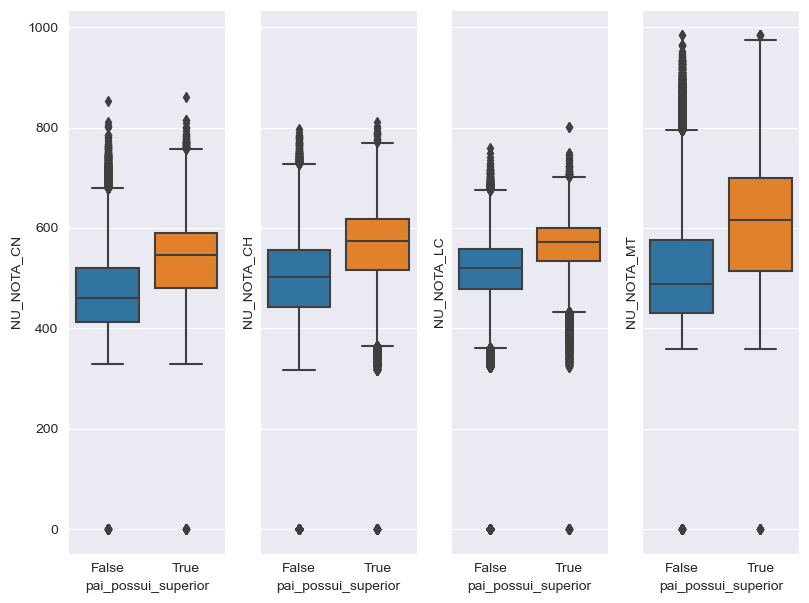

In [62]:
# Vamos plotar Boxplots para comparar o desempenho, por escolaridade do pai do candidato, em cada prova:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax = graficos[i])

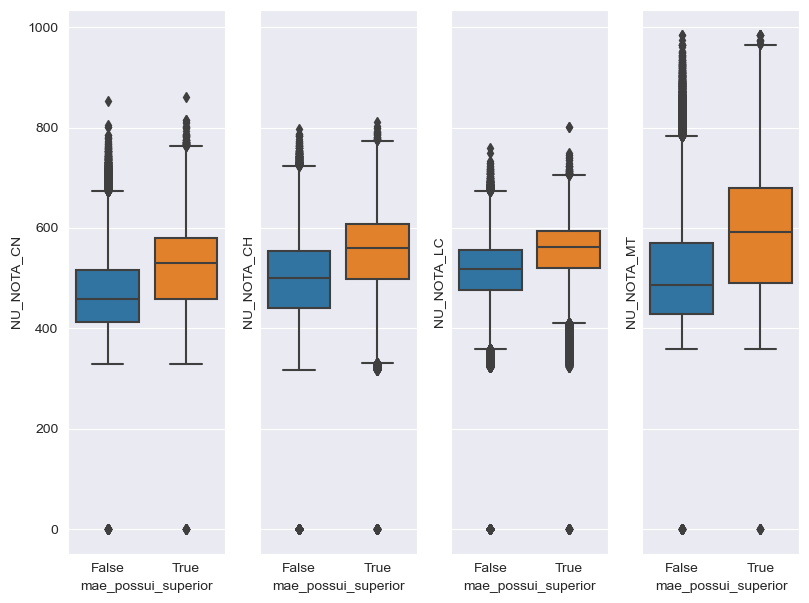

In [63]:
# Vamos plotar Boxplots para comparar o desempenho, por escolaridade da mãe do candidato, em cada prova:

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax = graficos[i])

Percebe-se aqui a maior diferença até agora. Os candidatos cujos pais e mães possuem superior tiveram desempenho acima em todas as provas, especialmente na de Matemática.

Lembrando que não se pode fazer nenhuma inferência que correlacione a escolaridade dos pais do candidato com seu desempenho nas provas. Apenas extrair conclusões do que ocorreu com a amostra de 10% de todos os candidatos do Enem 2019.

<Axes: xlabel='NU_IDADE', ylabel='NU_NOTA_CN'>

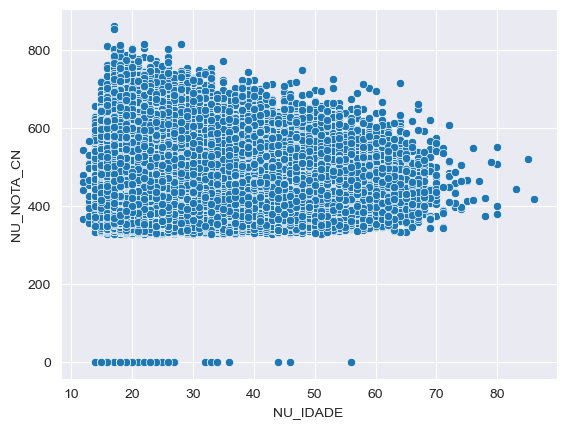

In [64]:
# Criando um DataFrame com as notas e as idades dos candidatos, e plotando um gráfico de dispersão das provas de Ciências Naturais:

df_idade = df_enem.loc[:, colunas_notas + ['NU_IDADE']]

sns.scatterplot(data=df_idade, x='NU_IDADE', y='NU_NOTA_CN')

<Axes: >

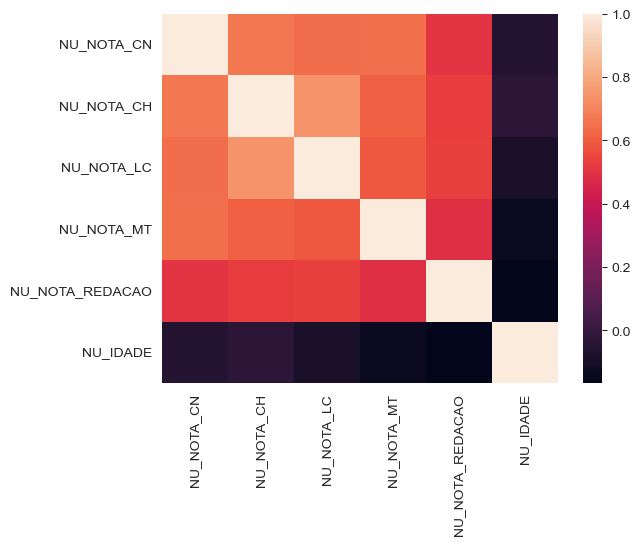

In [65]:
# Analisando a Correlação de Pearson entre Notas e Idades:

correlacoes_idade = df_idade.corr()
sns.heatmap(correlacoes_idade)

O interessante aqui é a última linha do heatmap. Percebe-se que não existe correlação alguma entre a idade dos candidatos e o seu desempenho nas provas do Enem 2019.

<Axes: xlabel='renda_familiar', ylabel='NU_NOTA_CN'>

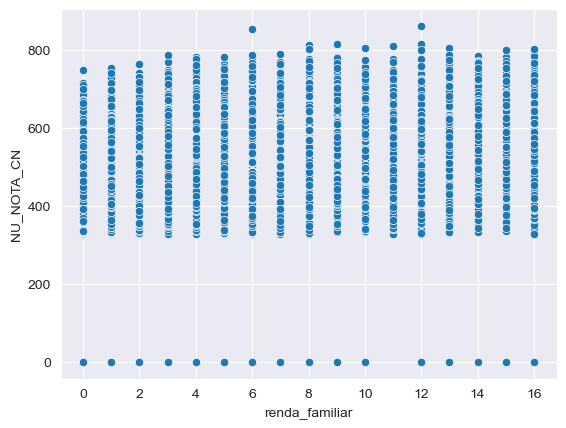

In [66]:
# Criando um DataFrame com as notas e a renda familiar dos candidatos, e plotando um gráfico de dispersão das provas de Ciências Naturais:

df_renda = df_enem.loc[:, colunas_notas + ['renda_familiar']]

sns.scatterplot(data=df_renda, x='renda_familiar', y='NU_NOTA_CN')

<Axes: >

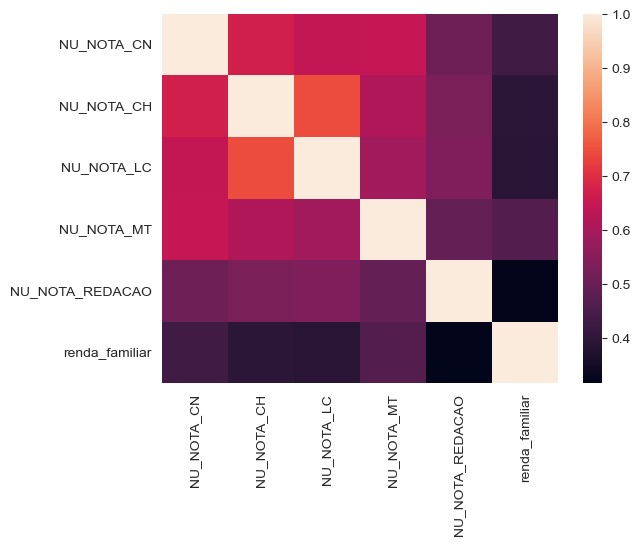

In [67]:
# Analisando a Correlação de Pearson entre Notas e Renda Familiar:

correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)

Existe pouca correlação entre a renda familiar e a nota, entre elas a que possui uma correlação um pouco maior é a nota de matemática. Lembrando que não se pode fazer nenhuma inferência que correlacione a renda familiar do candidato com seu desempenho nas provas. Apenas extrair conclusões do que ocorreu com a amostra de 10% de todos os candidatos do Enem 2019.

## <a> Conclusões </a>

Depois de analisar os dados com o objetivo de avaliar possíveis relações entre características demográficas dos candidatos e as notas dos mesmos, podemos afirmar que existe alguma evidência de que há correlações entre as notas:
- Raça (principalmente indígenas, que foi ligeiramente inferior às demais e bracas e que não informaram que foram ligeiramente superior)
- Escolaridade dos pais (candidatos com pais que possuem ensino superior se sairam melhor)
- Renda familiar na nota de matemática (correlação pouco acima de 0,5)

Não pudemos confirmar com essa amostra que gênero, idade, atendimento especializado tem relação com as notas.

Ficou claro que a grande maioria dos candidatos é de origem "humilde" com renda familiar inferior a R$2.000,00

O candidato "padrão" do ENEM é mulher, com 18 anos, solteira, parda, com renda familiar inferior a R$1.500,00 com ambos pai e mãe sem ensino superior completo.

OBS: Como nenhum teste estatístico foi realizado, não podemos afirmar a CAUSALIDADE de nenhuma característica demográfica com a nota dos estudantes.